In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression

# y = x_1 + sin(6 * pi * x_2) + 0.1 * N(0, 1),
# that is the third features is completely irrelevant
np.random.seed(0)
X = np.random.rand(1000, 3)
y = X[:, 0] + np.sin(6 * np.pi * X[:, 1]) + 0.1 * np.random.randn(1000)


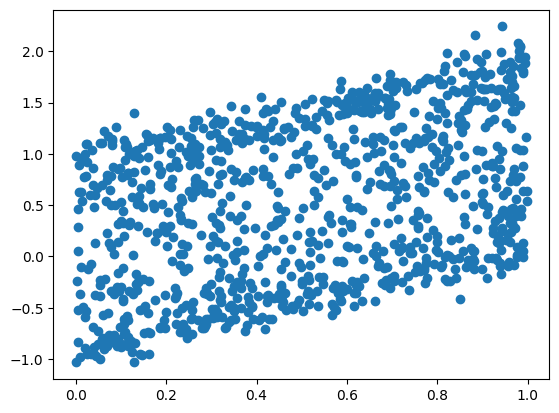

In [5]:
plt.scatter(X[:, 0], y);

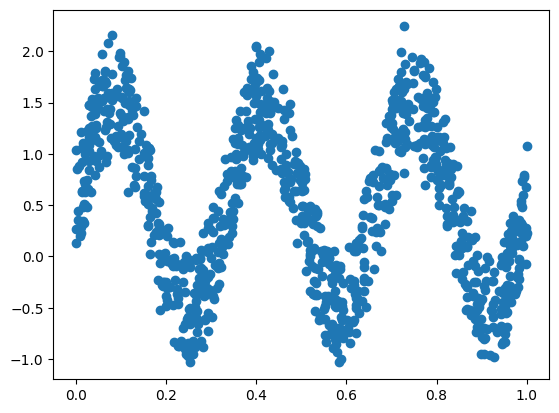

In [6]:
plt.scatter(X[:, 1], y);

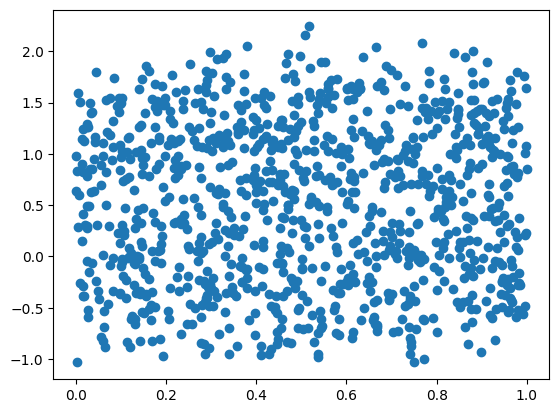

In [7]:
plt.scatter(X[:, 2], y);

In [8]:

f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)


In [9]:
f_test

array([1.        , 0.28024353, 0.00252204])

In [10]:
mi

array([0.36448455, 1.        , 0.        ])

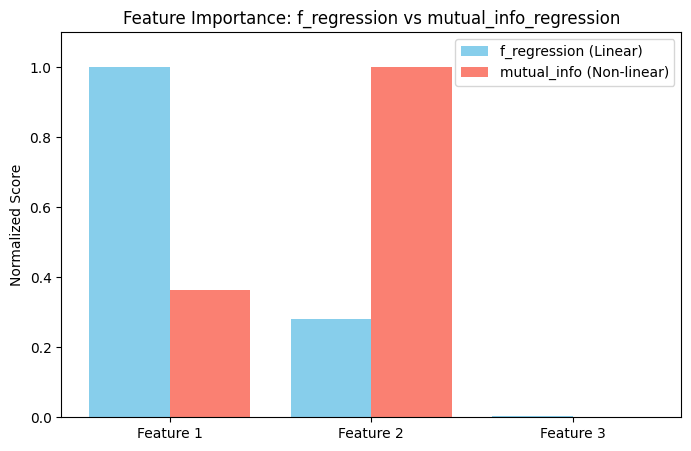

In [3]:
plt.figure(figsize=(8, 5))
plt.bar(np.arange(X.shape[1]) - 0.2, f_test, width=0.4, label="f_regression (Linear)", color='skyblue')
plt.bar(np.arange(X.shape[1]) + 0.2, mi, width=0.4, label="mutual_info (Non-linear)", color='salmon')
plt.xticks(np.arange(X.shape[1]), ["Feature 1", "Feature 2", "Feature 3"])
plt.ylim(0, 1.1)
plt.ylabel("Normalized Score")
plt.title("Feature Importance: f_regression vs mutual_info_regression")
plt.legend()
plt.show()

In [14]:
from sklearn.feature_selection import VarianceThreshold

In [11]:
X = [
    [1, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [0, 1, 1],
    [0, 1, 1],
    [0, 1, 1]
]


In [ ]:
# feature:
# x1: [1, 0, 1, 0, 0, 0] → بیشتر صفر هست (most zero) → p = 4/6 = 0.666 < 0.8
# x2: [0, 1, 0, 1, 1, 1] → بیشتر یک هست
# x3: [1, 1, 1, 1, 1, 1] → همه‌اش ۱ (all one)


In [12]:
t = 0.8 * (1 - 0.8)


In [15]:
sel = VarianceThreshold(threshold = t)
sel.fit_transform(X)


array([[1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1]])

In [16]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest , chi2


In [18]:
iris=load_iris()
x=iris.data
y=iris.target

In [25]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [22]:
s=SelectKBest(chi2, k=3)

In [23]:
x_new=s.fit_transform(x,y)

In [24]:
x_new

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2],
       [5.4, 1.7, 0.4],
       [4.6, 1.4, 0.3],
       [5. , 1.5, 0.2],
       [4.4, 1.4, 0.2],
       [4.9, 1.5, 0.1],
       [5.4, 1.5, 0.2],
       [4.8, 1.6, 0.2],
       [4.8, 1.4, 0.1],
       [4.3, 1.1, 0.1],
       [5.8, 1.2, 0.2],
       [5.7, 1.5, 0.4],
       [5.4, 1.3, 0.4],
       [5.1, 1.4, 0.3],
       [5.7, 1.7, 0.3],
       [5.1, 1.5, 0.3],
       [5.4, 1.7, 0.2],
       [5.1, 1.5, 0.4],
       [4.6, 1. , 0.2],
       [5.1, 1.7, 0.5],
       [4.8, 1.9, 0.2],
       [5. , 1.6, 0.2],
       [5. , 1.6, 0.4],
       [5.2, 1.5, 0.2],
       [5.2, 1.4, 0.2],
       [4.7, 1.6, 0.2],
       [4.8, 1.6, 0.2],
       [5.4, 1.5, 0.4],
       [5.2, 1.5, 0.1],
       [5.5, 1.4, 0.2],
       [4.9, 1.5, 0.2],
       [5. , 1.2, 0.2],
       [5.5, 1.3, 0.2],
       [4.9, 1.4, 0.1],
       [4.4, 1.3, 0.2],
       [5.1, 1.5, 0.2],
       [5. , 1.3, 0.3],
       [4.5, 1.3

In [26]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel


In [29]:
m = LinearSVC(C=0.01, penalty="l1", dual=False)
clf = m.fit(x, y)



In [31]:
s = SelectFromModel(clf, prefit=True)

Xnew = s.transform(x)
Xnew

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4],
       [5.4, 3.9, 1.7],
       [4.6, 3.4, 1.4],
       [5. , 3.4, 1.5],
       [4.4, 2.9, 1.4],
       [4.9, 3.1, 1.5],
       [5.4, 3.7, 1.5],
       [4.8, 3.4, 1.6],
       [4.8, 3. , 1.4],
       [4.3, 3. , 1.1],
       [5.8, 4. , 1.2],
       [5.7, 4.4, 1.5],
       [5.4, 3.9, 1.3],
       [5.1, 3.5, 1.4],
       [5.7, 3.8, 1.7],
       [5.1, 3.8, 1.5],
       [5.4, 3.4, 1.7],
       [5.1, 3.7, 1.5],
       [4.6, 3.6, 1. ],
       [5.1, 3.3, 1.7],
       [4.8, 3.4, 1.9],
       [5. , 3. , 1.6],
       [5. , 3.4, 1.6],
       [5.2, 3.5, 1.5],
       [5.2, 3.4, 1.4],
       [4.7, 3.2, 1.6],
       [4.8, 3.1, 1.6],
       [5.4, 3.4, 1.5],
       [5.2, 4.1, 1.5],
       [5.5, 4.2, 1.4],
       [4.9, 3.1, 1.5],
       [5. , 3.2, 1.2],
       [5.5, 3.5, 1.3],
       [4.9, 3.6, 1.4],
       [4.4, 3. , 1.3],
       [5.1, 3.4, 1.5],
       [5. , 3.5, 1.3],
       [4.5, 2.3

# **Tree Based Feauture Selection**

In [32]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel


In [33]:
clf=ExtraTreesClassifier(n_estimators=50)
clf.fit(x,y)

ExtraTreesClassifier(n_estimators=50)

In [34]:
clf.feature_importances_

array([0.09761625, 0.06622214, 0.4283948 , 0.4077668 ])

In [35]:
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# generate dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10)
y.shape

# define feature selection
fs = SelectKBest(score_func=f_regression, k=10)

# apply feature selection
X_selected = fs.fit_transform(X, y)
X_selected.shape


(1000, 10)

In [6]:
# ANOVA feature selection for numeric input and categorical output
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import pandas as pd

# generate dataset
x, y = make_classification(n_samples=100, n_features=5, n_informative=2)
y





array([1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1])

In [10]:
# create dataframe for better view
data = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(X.shape[1])])
data['y'] = y
data


,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,y
0,-0.453127,-1.192370,-1.052517,-0.911294,0.156894,1
1,1.817800,0.704283,-2.321199,-2.624204,2.538754,0
2,-1.060188,0.421971,1.178704,1.188884,-0.776424,0
3,0.410526,-0.820985,-1.529617,-1.492442,0.827764,1
4,-0.685579,-1.215275,-0.533763,-0.349609,-0.322024,1
...,...,...,...,...,...,...
95,0.524749,-0.193483,0.446694,0.515685,-0.526675,1
96,-0.333182,-1.377427,0.943330,1.267585,-1.749441,1
97,0.036994,-1.020678,0.756759,1.001343,-1.347979,1
98,0.674304,-1.469560,-0.691343,-0.472082,-0.348367,1


In [11]:
data.corr()

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,y
Feature_0,1.000000,0.013669,-0.072540,-0.074737,0.066765,-0.018202
Feature_1,0.013669,1.000000,0.065749,-0.126761,0.607482,0.047053
Feature_2,-0.072540,0.065749,1.000000,0.981453,-0.752674,-0.050730
Feature_3,-0.074737,-0.126761,0.981453,1.000000,-0.864931,-0.059470
Feature_4,0.066765,0.607482,-0.752674,-0.864931,1.000000,0.071431
y,-0.018202,0.047053,-0.050730,-0.059470,0.071431,1.000000


In [12]:
# 📊 For Regression (numeric input, numeric output)

# f_regression → Computes Pearson correlation and converts it to an F-statistic.

# mutual_info_regression → Estimates mutual information between each feature and the target (non-linear relationships possible).

# 📈 For Classification (numeric input, categorical output)

# f_classif → Performs ANOVA F-test between each feature and the target.

# mutual_info_classif → Estimates mutual information between each feature and the target class.

# chi2 → Chi-squared test between each feature and the target (requires non-negative feature values).

# 📐 For Special / Mixed cases

# You can also pass your own custom scoring function with the signature:

In [8]:

# define feature selection
fs = SelectKBest(score_func=f_classif, k=2)

# apply feature selection
X_selected = fs.fit_transform(X, y)

In [9]:

print("Selected shape:", X_selected.shape)

for i, score in enumerate(fs.scores_):
    print(f"Feature_{i}: {score}")

Selected shape: (100, 2)
Feature_0: 0.0324797382202246
Feature_1: 0.21745265796224325
Feature_2: 0.2528599312442406
Feature_3: 0.34782562059565436
Feature_4: 0.5025955486155965


In [15]:
import numpy as np

np.set_printoptions(precision=3)
fit=fs.fit(x,y)
print(fit.scores_)

[165.32    0.946   1.837  51.893 334.502]
